In [1]:
from keras import layers
from keras import models

Using TensorFlow backend.
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\ANACONDA\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [3]:
training_data = []
training_label = []
DATADIR = "_train"
CATAGORIES = ['airplane','car','cat','dog','flower','fruit','motorbike','person']
for category in CATAGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        training_label.append(CATAGORIES.index(category))
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array,(50,50))
        training_data.append(img_array)

In [4]:
np.shape(training_data)

(5959, 50, 50)

In [5]:
np.shape(training_label)

(5959,)

In [6]:
#training_data = training_data.tolist(training_data)
#training_data.shape

In [7]:
training_data = np.reshape(training_data,(5959,50*50))
#training_data = training_data.astype('float32')/255

In [8]:
from keras import layers
from keras import models

In [9]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(50 * 50,)))
network.add(layers.Dense(500,activation='relu'))
network.add(layers.Dense(8,activation='softmax'))

In [10]:
network.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [11]:
from keras.utils import to_categorical
training_label = to_categorical(training_label)

In [12]:
np.shape(training_label)

(5959, 8)

In [13]:
#training_label[1:5,:]

In [14]:
c = list(zip(training_data,training_label))
import random
random.shuffle(c)
training_data,training_label = zip(*c)

In [15]:
training_data = np.array(training_data)/255
training_label = np.array(training_label)/1

training_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [16]:
history=network.fit(training_data,training_label,epochs=15,batch_size=128)

Epoch 1/15
5959/5959 [==============================] - 1s - loss: 4.3020 - acc: 0.2787     
Epoch 2/15
5959/5959 [==============================] - 1s - loss: 1.5626 - acc: 0.4375     
Epoch 3/15
5959/5959 [==============================] - 1s - loss: 1.2916 - acc: 0.5348     
Epoch 4/15
5959/5959 [==============================] - 1s - loss: 1.1671 - acc: 0.5816     
Epoch 5/15
5959/5959 [==============================] - 1s - loss: 1.1065 - acc: 0.6152     
Epoch 6/15
5959/5959 [==============================] - 1s - loss: 0.9797 - acc: 0.6427     
Epoch 7/15
5959/5959 [==============================] - 1s - loss: 0.9268 - acc: 0.6661     
Epoch 8/15
5959/5959 [==============================] - 1s - loss: 0.9203 - acc: 0.6749     
Epoch 9/15
5959/5959 [==============================] - 1s - loss: 0.8034 - acc: 0.7130     
Epoch 10/15
5959/5959 [==============================] - 1s - loss: 0.7987 - acc: 0.7182     
Epoch 11/15
5959/5959 [==============================] - 1s - loss: 0

In [17]:
DATADIR = "_test"
CATAGORIES = ['airplane','car','cat','dog','flower','fruit','motorbike','person']
test_data = []
test_label = []
for category in CATAGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        test_label.append(CATAGORIES.index(category))
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array = cv2.resize(img_array,(50,50))
        test_data.append(img_array)

In [18]:
np.shape(test_data)

(940, 50, 50)

In [19]:
np.shape(test_label)

(940,)

In [20]:
test_data = np.reshape(test_data,(940,50*50))


In [21]:
from keras.utils import to_categorical
test_label = to_categorical(test_label)

In [22]:
#This step is basically for the conversion to float values
test_data= np.array(test_data)/255
test_label=np.array(test_label)/1
test_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
test_loss, test_accu = network.evaluate(test_data, test_label)

704/940 [=====================>........] - ETA: 0s

In [24]:
print(test_loss,test_accu)

0.8947201222468643 0.701063829787234


In [25]:
import matplotlib.pyplot as plt

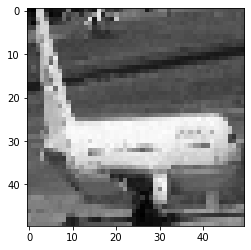

'airplane'

In [80]:
z=random.randint(1,940)
image = training_data[z].reshape((50,50))
plt.imshow(image,cmap='gray')
plt.show()
a=network.predict(image.reshape((1,2500)))
a = np.argmax(a,axis=1)

CATAGORIES[a[0]]

In [27]:
history_dict = history.history
history_dict.keys()
loss = history_dict['loss']
acc = history_dict['acc']

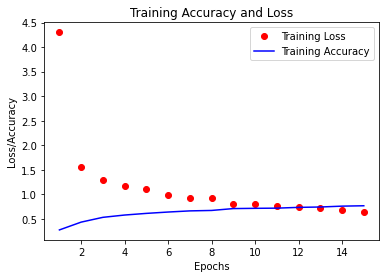

In [28]:
import matplotlib.pyplot as plt
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.title('Training Accuracy and Loss')
plt.show()

In [27]:
test_data[z].shape

(2500,)

In [70]:
a=network.predict(image.reshape((1,2500)))

In [71]:
a

array([[4.0798312e-07, 8.1762346e-07, 4.2854565e-05, 1.9251215e-04,
        1.3061880e-05, 4.9782120e-06, 3.1720663e-08, 9.9974531e-01]],
      dtype=float32)

In [72]:
np.sum(a)

1.0

In [73]:
a = np.argmax(a,axis=1)
a

array([7], dtype=int64)

In [74]:
CATAGORIES[a[0]]

'person'